With 0_data_jobs_categorization_I and 02_data_jobs_categorization_II I'm going to use the clean-up data to do some more analysis.

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import pickle
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import lxml

### 00_Data_Prep

web scrap the 4 types of jobs separately and put them together in the same df with type categorization separation

In [2]:
# 1) ML
links = [
#     'https://h1bdata.info/index.php?em=&job=Research+Scientist&city=&year=All+Years',
#     'https://h1bdata.info/index.php?em=&job=Research+Scientist+&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Applied+Scientist&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Applied+Scientist+&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Machine+Learning+&city=&year=All+Years',
]

jobs_list_ML = []
for link in links:
    page_link = link
    page_response = requests.get(page_link, timeout=1000)
    page_content = BeautifulSoup(page_response.content, 'lxml')

    for row in page_content.find_all('tr')[1:]:
        row_data = []
        for i in row:
            row_data.append(i.text)
        jobs_list_ML.append(row_data)

# Put everything into dataframes for easier processing
ML_df = pd.DataFrame()
ML_df['type'] = ['ML' for i in jobs_list_ML]
ML_df['company'] = [i[0] for i in jobs_list_ML]
ML_df['title'] = [i[1] for i in jobs_list_ML]
ML_df['salary'] = [i[2].replace(',','') for i in jobs_list_ML]
ML_df['salary'] = ML_df['salary'].astype(float)
ML_df['location'] = [i[3] for i in jobs_list_ML]
ML_df['date'] = [i[4] for i in jobs_list_ML]
ML_df['date'] = pd.to_datetime(ML_df['date'])
ML_df['year'] = [i.year for i in ML_df['date']]

In [3]:
# 2) DS
links = [
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Senior+Data+Scientist&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist+&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Science+&city=&year=All+Years',
]

jobs_list_DS = []
for link in links:
    page_link = link
    page_response = requests.get(page_link, timeout=1000)
    page_content = BeautifulSoup(page_response.content, 'lxml')

    for row in page_content.find_all('tr')[1:]:
        row_data = []
        for i in row:
            row_data.append(i.text)
        jobs_list_DS.append(row_data)

# Put everything into dataframes for easier processing
DS_df = pd.DataFrame()
DS_df['type'] = ['DS' for i in jobs_list_DS]
DS_df['company'] = [i[0] for i in jobs_list_DS]
DS_df['title'] = [i[1] for i in jobs_list_DS]
DS_df['salary'] = [i[2].replace(',','') for i in jobs_list_DS]
DS_df['salary'] = DS_df['salary'].astype(float)
DS_df['location'] = [i[3] for i in jobs_list_DS]
DS_df['date'] = [i[4] for i in jobs_list_DS]
DS_df['date'] = pd.to_datetime(DS_df['date'])
DS_df['year'] = [i.year for i in DS_df['date']]

In [4]:
# 3) DA
links = [
    'https://h1bdata.info/index.php?em=&job=Data+Analyst&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Analyst+&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Senior+Data+Analyst&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Analytics+&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Analysis+&city=&year=All+Years',
]

jobs_list_DA = []
for link in links:
    page_link = link
    page_response = requests.get(page_link, timeout=1000)
    page_content = BeautifulSoup(page_response.content, 'lxml')

    for row in page_content.find_all('tr')[1:]:
        row_data = []
        for i in row:
            row_data.append(i.text)
        jobs_list_DA.append(row_data)

# Put everything into dataframes for easier processing
DA_df = pd.DataFrame()
DA_df['type'] = ['DA' for i in jobs_list_DA]
DA_df['company'] = [i[0] for i in jobs_list_DA]
DA_df['title'] = [i[1] for i in jobs_list_DA]
DA_df['salary'] = [i[2].replace(',','') for i in jobs_list_DA]
DA_df['salary'] = DA_df['salary'].astype(float)
DA_df['location'] = [i[3] for i in jobs_list_DA]
DA_df['date'] = [i[4] for i in jobs_list_DA]
DA_df['date'] = pd.to_datetime(DA_df['date'])
DA_df['year'] = [i.year for i in DA_df['date']]

In [5]:
# 4) DE
links = [
    'https://h1bdata.info/index.php?em=&job=Data+Engineer&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Senior+Data+Engineer&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Engineer+&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Engineering+&city=&year=All+Years',
]

jobs_list_DE = []
for link in links:
    page_link = link
    page_response = requests.get(page_link, timeout=1000)
    page_content = BeautifulSoup(page_response.content, 'lxml')

    for row in page_content.find_all('tr')[1:]:
        row_data = []
        for i in row:
            row_data.append(i.text)
        jobs_list_DE.append(row_data)

# Put everything into dataframes for easier processing
DE_df = pd.DataFrame()
DE_df['type'] = ['DE' for i in jobs_list_DE]
DE_df['company'] = [i[0] for i in jobs_list_DE]
DE_df['title'] = [i[1] for i in jobs_list_DE]
DE_df['salary'] = [i[2].replace(',','') for i in jobs_list_DE]
DE_df['salary'] = DE_df['salary'].astype(float)
DE_df['location'] = [i[3] for i in jobs_list_DE]
DE_df['date'] = [i[4] for i in jobs_list_DE]
DE_df['date'] = pd.to_datetime(DE_df['date'])
DE_df['year'] = [i.year for i in DE_df['date']]

In [6]:
# 5) RS
links = [
    'https://h1bdata.info/index.php?em=&job=Research+Scientist&city=&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Research+Scientist+&city=&year=All+Years',
]

jobs_list_RS = []
for link in links:
    page_link = link
    page_response = requests.get(page_link, timeout=1000)
    page_content = BeautifulSoup(page_response.content, 'lxml')

    for row in page_content.find_all('tr')[1:]:
        row_data = []
        for i in row:
            row_data.append(i.text)
        jobs_list_RS.append(row_data)

# Put everything into dataframes for easier processing
RS_df = pd.DataFrame()
RS_df['type'] = ['ML' for i in jobs_list_RS]
RS_df['company'] = [i[0] for i in jobs_list_RS]
RS_df['title'] = [i[1] for i in jobs_list_RS]
RS_df['salary'] = [i[2].replace(',','') for i in jobs_list_RS]
RS_df['salary'] = RS_df['salary'].astype(float)
RS_df['location'] = [i[3] for i in jobs_list_RS]
RS_df['date'] = [i[4] for i in jobs_list_RS]
RS_df['date'] = pd.to_datetime(RS_df['date'])
RS_df['year'] = [i.year for i in RS_df['date']]

In [7]:
# RS cleanup

# create a set to store the list of companies 
company_set = set(i for i in DE_df.company)
company_set.add(i for i in DA_df.company)
company_set.add(i for i in DS_df.company)
company_set.add(i for i in ML_df.company)

company_df = pd.DataFrame(data=company_set, columns=['company'])

# filter out some research scienctist title in ML_df
RS_df = RS_df.merge(company_df, how='inner')

### 01_Combine 4 Types
Combine all the df for analysis

In [9]:
Data_Jobs = [ML_df,DS_df,DA_df,DE_df,RS_df]
Data_Jobs_df = pd.concat(Data_Jobs)

# Drop pre 2014 data (very few observations pre 2014)
Data_Jobs_df.drop(Data_Jobs_df[Data_Jobs_df['year']<=2014].index, axis=0, inplace=True)

# Drop salaries over $400,000
Data_Jobs_df.drop(Data_Jobs_df[Data_Jobs_df['salary']>400000].index, axis=0, inplace=True)

# Drop salaries lower than $200,000
Data_Jobs_df.drop(Data_Jobs_df[Data_Jobs_df['salary']<20000].index, axis=0, inplace=True)

# Sort by company and year
Data_Jobs_df.sort_values(by=['year','company'], inplace=True, ascending=True)

Data_Jobs_df.shape

(28249, 7)

In [15]:
Data_Jobs_df.to_csv("Data_Jobs.csv")

In [13]:
# aggregation_stats
Job_Counts = Data_Jobs_df[
    ["type","title"]
].groupby(["type"]).count().sort_values(by=["title"], ascending=False).rename(columns={'title':'counts'})

Job_Counts

,counts
type,
DA,10387
DS,10296
DE,4865
ML,2701


### 02_Plotting

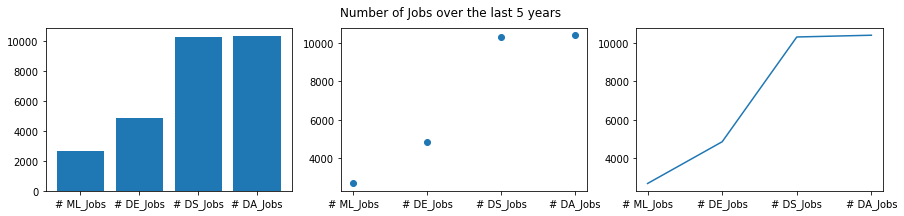

In [18]:
# Number of Jobs over the last 5 years 
names = ['# ML_Jobs','# DE_Jobs','# DS_Jobs','# DA_Jobs']
values = [2701,4865,10296,10387]

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Number of Jobs over the last 5 years')
plt.show()